<a href="https://colab.research.google.com/github/Daffanugraha/UAP-ML/blob/main/Stunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import csv from folder in drive the name folder is UAP the file is data_balita

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/UAP/data_balita.csv"  # Update with the correct path

df= pd.read_csv(file_path)
df

Mounted at /content/drive


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:
# prompt: pada tinggi badan jadikan 2koma belakang



# Round the 'tinggi_badan' column to 2 decimal places
df['Tinggi Badan (cm)'] = df['Tinggi Badan (cm)'].round(2)

df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010000
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:


# Check for duplicates based on all columns
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
  print("Duplicate Rows:")
  print(duplicate_rows)
else:
  print("No duplicate rows found.")



Duplicate Rows:
        Umur (bulan) Jenis Kelamin  Tinggi Badan (cm) Status Gizi
71                 0     laki-laki              53.53      normal
72                 0     laki-laki              44.59     stunted
121                0     laki-laki              57.88      tinggi
131                0     laki-laki              58.89      tinggi
175                0     laki-laki              55.08      normal
...              ...           ...                ...         ...
120994            60     perempuan             100.60      normal
120995            60     perempuan              98.30     stunted
120996            60     perempuan             121.30      normal
120997            60     perempuan             112.20      normal
120998            60     perempuan             109.80      normal

[82647 rows x 4 columns]


In [ ]:
# prompt: remove duplicate

# Drop duplicate rows
df = df.drop_duplicates()

# Print some info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 38352 entries, 0 to 120993
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       38352 non-null  int64  
 1   Jenis Kelamin      38352 non-null  object 
 2   Tinggi Badan (cm)  38352 non-null  float64
 3   Status Gizi        38352 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


,Umur (bulan),Tinggi Badan (cm)
count,38352.000000,38352.000000
mean,29.069227,86.910543
std,18.964622,19.284039
min,0.000000,40.010000
25%,12.000000,73.700000
50%,30.000000,89.100000
75%,46.000000,101.200000
max,60.000000,128.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Kolom yang perlu di-encode
columns_to_encode = ['Jenis Kelamin', 'Status Gizi']

# Dictionary untuk menyimpan mapping
column_mappings = {}

# Melakukan encoding dan menyimpan mapping
for column in columns_to_encode:
    label_encoder.fit(df[column])
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    column_mappings[column] = mapping
    df[column] = label_encoder.transform(df[column])

# Menampilkan hasil encoding
print("Hasil Encoding Dataset:")
print(df.head())

# Menampilkan mapping
print("\nMapping untuk setiap kolom:")
for column, mapping in column_mappings.items():
    print(f"{column}: {mapping}")


Hasil Encoding Dataset:
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0             0              0              44.59            2
1             0              0              56.71            3
2             0              0              46.86            0
3             0              0              47.51            0
4             0              0              42.74            1

Mapping untuk setiap kolom:
Jenis Kelamin: {'laki-laki': 0, 'perempuan': 1}
Status Gizi: {'normal': 0, 'severely stunted': 1, 'stunted': 2, 'tinggi': 3}


<ipython-input-8-2011de8ad6da>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.transform(df[column])
<ipython-input-8-2011de8ad6da>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.transform(df[column])


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_test.shape

(7671, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),           # Explicit input layer
    Dense(32, activation='relu'),              # First hidden layer
    Dense(16, activation='relu'),              # Second hidden layer
    Dense(4, activation='softmax')             # Output layer for 4 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4814 - loss: 3.0600 - val_accuracy: 0.5426 - val_loss: 1.0623
Epoch 2/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5671 - loss: 1.0507 - val_accuracy: 0.5631 - val_loss: 0.9917
Epoch 3/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5811 - loss: 0.9932 - val_accuracy: 0.5884 - val_loss: 0.9444
Epoch 4/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6088 - loss: 0.9299 - val_accuracy: 0.6208 - val_loss: 0.8890
Epoch 5/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6354 - loss: 0.8749 - val_accuracy: 0.6578 - val_loss: 0.8309
Epoch 6/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6635 - loss: 0.8154 - val_accuracy: 0.6772 - val_loss: 0.7664
Epoch 7/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6970 - loss: 0.7492 - val_accuracy: 0.7691 - val_loss: 0.7046
Epoch 8/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7343 - loss: 0.6787 - val_accuracy: 0.

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.50 KB)

 Trainable params: 724 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,450 (5.67 KB)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluasi akurasi pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data uji: {test_accuracy * 100:.2f}%")

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9006 - loss: 0.2700
Akurasi pada data uji: 89.71%


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the class with highest probability

# Menghitung classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      4184
           1       0.98      0.87      0.92      1268
           2       0.76      0.52      0.62       883
           3       0.89      0.96      0.93      1336

    accuracy                           0.90      7671
   macro avg       0.88      0.83      0.85      7671
weighted avg       0.89      0.90      0.89      7671



In [ ]:
# prompt: simpan hasil  model ANN menggunakan h5

from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
import numpy as np



model.save('/content/drive/My Drive/UAP/ffnn_model.h5')
print("Model saved to /content/drive/My Drive/UAP/ffnn_model.h5")

Model saved to /content/drive/My Drive/UAP/ffnn_model.h5


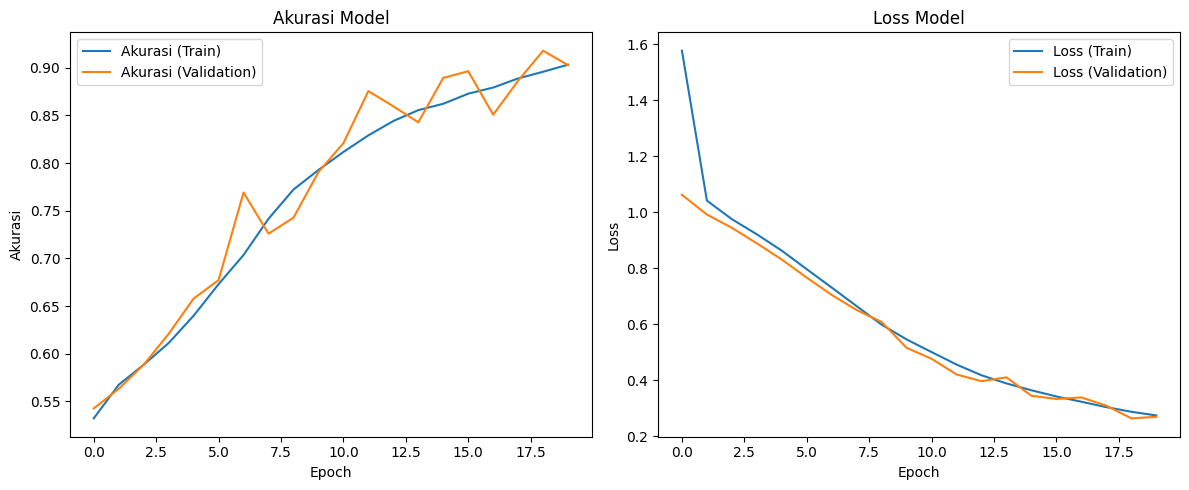

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi akurasi
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi (Train)')
plt.plot(history.history['val_accuracy'], label='Akurasi (Validation)')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Text(95.72222222222221, 0.5, 'Truth')

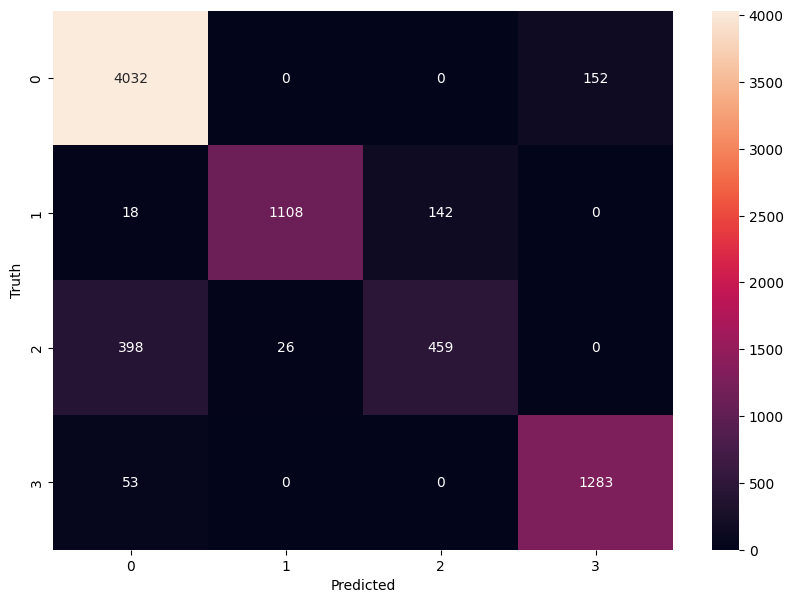

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model menggunakan data pelatihan
model_rf.fit(X_train, y_train)

print("Model Random Forest telah berhasil dilatih.")


Model Random Forest telah berhasil dilatih.


In [ ]:
from sklearn.metrics import classification_report

y_pred = model_rf.predict(X_test)

y_pred = y_pred.astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4184
           1       0.99      0.99      0.99      1268
           2       0.97      0.97      0.97       883
           3       0.99      0.99      0.99      1336

    accuracy                           0.99      7671
   macro avg       0.99      0.99      0.99      7671
weighted avg       0.99      0.99      0.99      7671



In [ ]:
# prompt: save model for random forest

import joblib

# Save the Random Forest model
joblib.dump(model_rf, '/content/drive/My Drive/UAP/random_forest_model.joblib')
print("Random Forest model saved to /content/drive/My Drive/UAP/random_forest_model.joblib")

Random Forest model saved to /content/drive/My Drive/UAP/random_forest_model.joblib


In [ ]:
import pickle

# Simpan model ke file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
print("Model telah disimpan ke file 'random_forest_model.pkl'")


Model telah disimpan ke file 'random_forest_model.pkl'
